

**Importing Libraries and Packages**

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
!pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from bokeh.palettes import viridis
colors = viridis(10)
import plotly.io as pio
pio.renderers.default = "colab"

#preprocessing 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter
# Classification 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

     |████████████████████████████████| 64 kB 1.8 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=eb6cfba5e6f57fff2efe73447c1adfaa28b8f65420013767a1e9b08d11b6d23d
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Reading Data from heart.csv file into the data Frame heart_data

In [ ]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/heart.csv')

Exploring the dataset and identifying the null and missing values

In [ ]:
# print first 5 rows of the dataset
heart_data.head()

age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   63    1   3       145  233.0    1        0    150.0      0      2.3   
1   37    1   2       130  250.0    0        1    187.0      0      3.5   
2   41    0   1       130  204.0    0        0      NaN      0      1.4   
3   56    1   1       120    NaN    0        1    178.0      0      0.8   
4   57    0   0       120  354.0    0        1    163.0      1      0.6   

   slope  ca  thal  target  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
4      2   0     2       1

In [ ]:
# print last 5 rows of the dataset
heart_data.tail()

age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140  241.0    0        1    123.0      1      0.2   
299   45    1   3       110  264.0    0        1    132.0      0      1.2   
300   68    1   0       144  193.0    1        1    141.0      0      3.4   
301   57    1   0       130  131.0    0        1    115.0      1      1.2   
302   57    0   1       130  236.0    0        0    174.0      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

In [ ]:
heart_data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol        11
fbs          0
restecg      0
thalach     12
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [ ]:
heart_data['chol'].unique()

array([233., 250., 204.,  nan, 354., 192., 294., 263., 199., 168., 239.,
       266., 211., 283., 219., 340., 226., 247., 234., 243., 302., 212.,
       175., 417., 197., 198., 177., 273., 213., 304., 232., 269., 360.,
       308., 245., 208., 264., 321., 325., 235., 257., 216., 256., 231.,
       141., 252., 201., 222., 260., 182., 303., 265., 309., 186., 203.,
       183., 220., 209., 258., 227., 261., 221., 205., 240., 318., 298.,
       564., 277., 214., 248., 255., 207., 223., 288., 160., 394., 246.,
       244., 270., 195., 196., 236., 254., 126., 313., 262., 215., 193.,
       271., 268., 267., 210., 295., 306., 178., 242., 180., 228., 149.,
       278., 253., 342., 157., 286., 229., 284., 224., 206., 167., 230.,
       335., 276., 353., 225., 330., 290., 172., 305., 188., 282., 185.,
       326., 274., 164., 307., 249., 341., 407., 217., 174., 281., 289.,
       322., 299., 293., 184., 409., 259., 200., 327., 237., 275., 218.,
       319., 166., 315., 311., 169., 187., 176., 24

In [ ]:
heart_data['thalach'].unique()

array([150., 187.,  nan, 178., 163., 148., 153., 173., 162., 174., 160.,
       139., 171., 144., 158., 172., 114., 151., 179., 137., 157., 152.,
       168., 140., 188., 125., 170., 165., 142., 180., 143., 182., 156.,
       115., 149., 146., 175., 186., 185., 159., 130., 190., 132., 147.,
       154., 202., 161., 166., 164., 184., 122., 169., 138., 111., 145.,
       194., 131., 133., 155., 167., 192., 121.,  96., 126., 105., 181.,
       116., 108., 129., 120., 112., 128., 109., 113.,  99., 177., 141.,
       136.,  97., 127., 124.,  88., 195., 106.,  95., 117., 103.,  71.,
       118., 134.,  90., 123.])

In [ ]:
heart_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Calculating the mean to replace the null values with it.

In [ ]:
mean = round(heart_data['chol'].mean(),2)
mean

245.41

In [ ]:
heart_data["chol"].fillna(mean,inplace=True)
heart_data

age  sex  cp  trestbps    chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145  233.00    1        0    150.0      0      2.3   
1     37    1   2       130  250.00    0        1    187.0      0      3.5   
2     41    0   1       130  204.00    0        0      NaN      0      1.4   
3     56    1   1       120  245.41    0        1    178.0      0      0.8   
4     57    0   0       120  354.00    0        1    163.0      1      0.6   
..   ...  ...  ..       ...     ...  ...      ...      ...    ...      ...   
298   57    0   0       140  241.00    0        1    123.0      1      0.2   
299   45    1   3       110  264.00    0        1    132.0      0      1.2   
300   68    1   0       144  193.00    1        1    141.0      0      3.4   
301   57    1   0       130  131.00    0        1    115.0      1      1.2   
302   57    0   1       130  236.00    0        0    174.0      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [ ]:
mean_thalach = round(heart_data['thalach'].mean(),2)
mean_thalach

149.65

In [ ]:
heart_data["thalach"].fillna(mean,inplace=True)
heart_data

age  sex  cp  trestbps    chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145  233.00    1        0   150.00      0      2.3   
1     37    1   2       130  250.00    0        1   187.00      0      3.5   
2     41    0   1       130  204.00    0        0   245.41      0      1.4   
3     56    1   1       120  245.41    0        1   178.00      0      0.8   
4     57    0   0       120  354.00    0        1   163.00      1      0.6   
..   ...  ...  ..       ...     ...  ...      ...      ...    ...      ...   
298   57    0   0       140  241.00    0        1   123.00      1      0.2   
299   45    1   3       110  264.00    0        1   132.00      0      1.2   
300   68    1   0       144  193.00    1        1   141.00      0      3.4   
301   57    1   0       130  131.00    0        1   115.00      1      1.2   
302   57    0   1       130  236.00    0        0   174.00      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

Importing Data Visualization Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install hvplot

     |████████████████████████████████| 3.1 MB 5.1 MB/s 


In [ ]:
import hvplot.pandas

In [ ]:
from scipy import stats
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
heart_data.shape

(303, 14)

In [ ]:
heart_data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<BarContainer object of 2 artists>

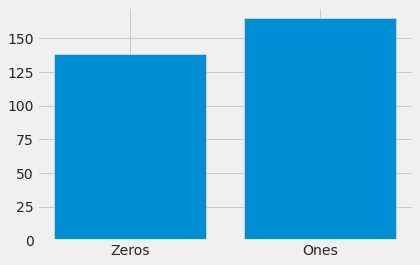

In [ ]:
o, z = heart_data.target.value_counts()

data = {'Zeros':z, 'Ones':o}
targets = list(data.keys())
values = list(data.values())

plt.bar(targets, values)

In [ ]:
have_disease = heart_data.loc[heart_data['target']==1, 'sex'].value_counts()
no_disease = heart_data.loc[heart_data['target']==0, 'sex'].value_counts()


In [ ]:
import seaborn as sns

Finding out how many males and females have a heart disease

In [ ]:
have_disease

1    93
0    72
Name: sex, dtype: int64

In [ ]:
no_disease

1    114
0     24
Name: sex, dtype: int64

Text(0.5, 1.0, 'Heart Disease by Gender')

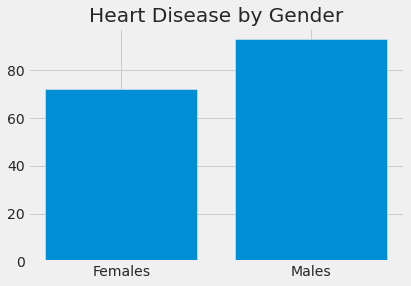

In [ ]:
o, z = have_disease

data = {'Females':z, 'Males':o}
targets = list(data.keys())
values = list(data.values())

plt.bar(targets, values)
plt.title('Heart Disease by Gender')

In [ ]:
categorical_val = []
continous_val = []
for column in heart_data.columns:
    if len(heart_data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [ ]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

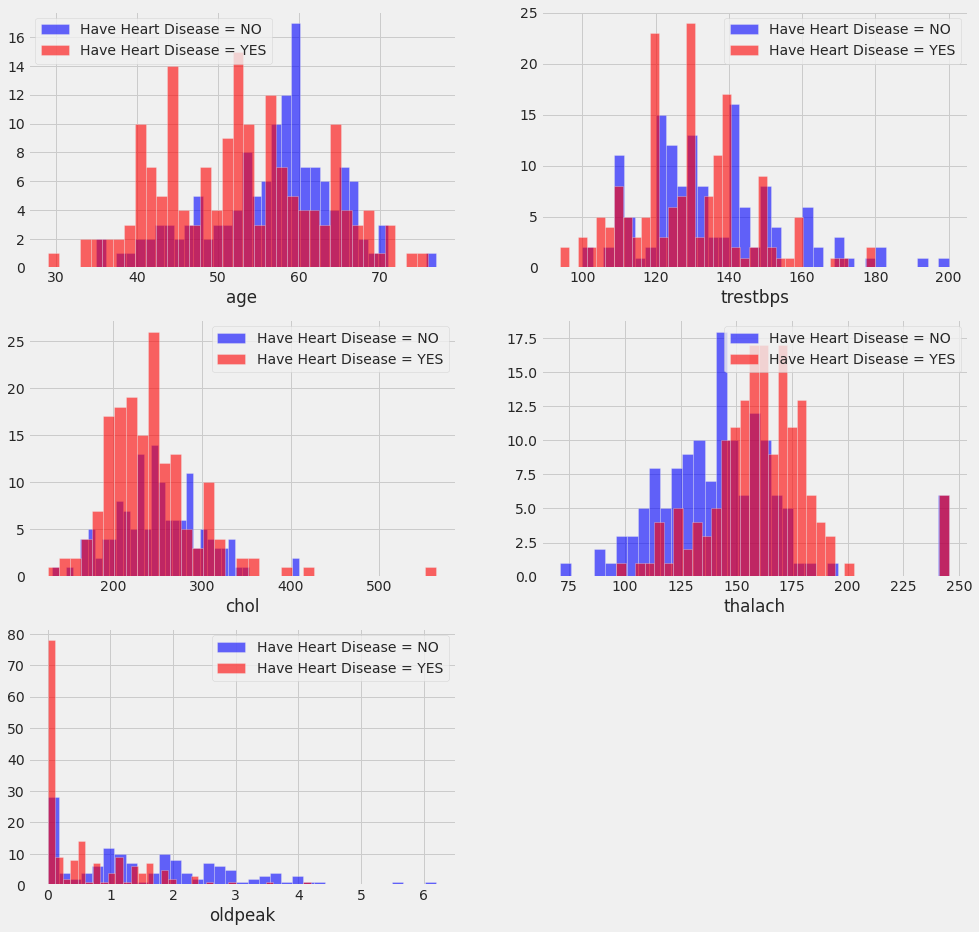

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    heart_data[heart_data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    heart_data[heart_data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

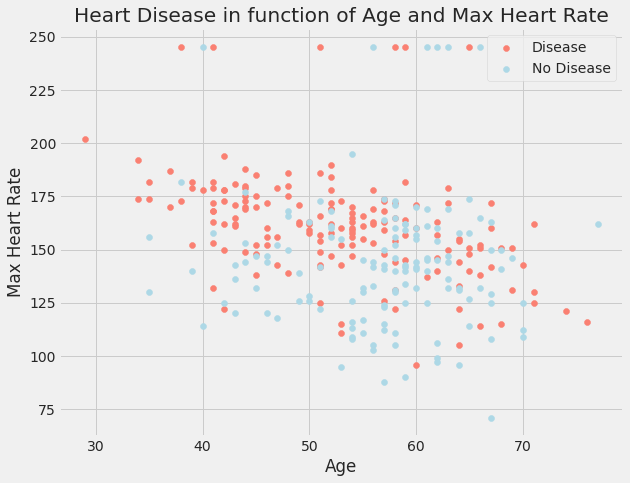

In [ ]:
# Create another figure
plt.figure(figsize=(9, 7))

# Scatter with postivie examples
plt.scatter(heart_data.age[heart_data.target==1],
            heart_data.thalach[heart_data.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(heart_data.age[heart_data.target==0],
            heart_data.thalach[heart_data.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

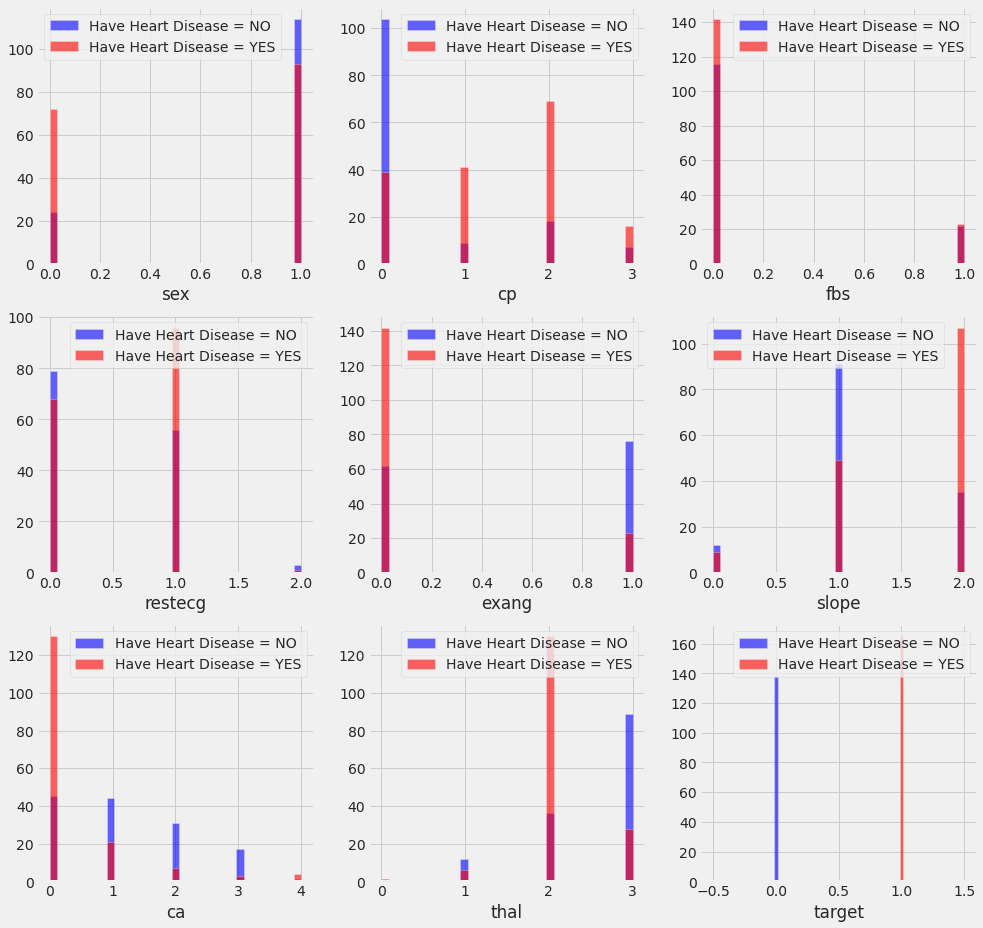

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    heart_data[heart_data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    heart_data[heart_data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

(14.5, -0.5)

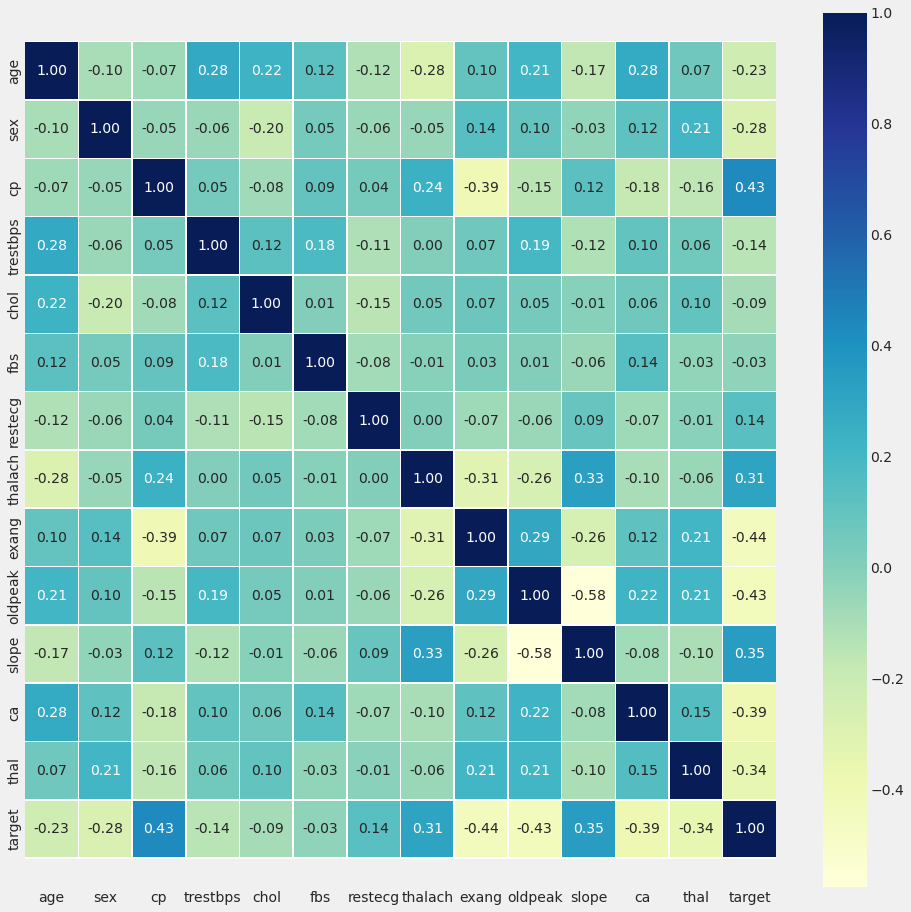

In [ ]:
# Let's make our correlation matrix a little prettier
corr_matrix = heart_data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
dat = heart_data.drop('target', axis=1).corrwith(heart_data.target)

Text(0.5, 1.0, 'Correlation between Heart Disease and Numeric Features')

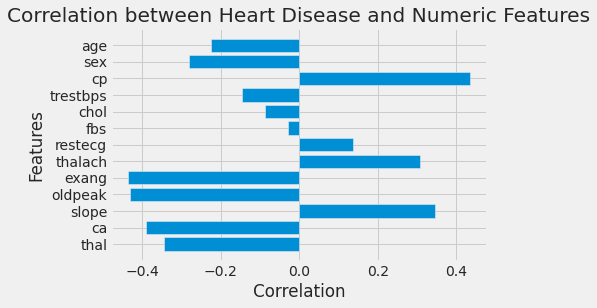

In [ ]:
fig, ax = plt.subplots()

names = dat.keys()
vals = dat.values

y_pos = np.arange(len(names))

ax.barh(y_pos, vals, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(names)
ax.invert_yaxis()
ax.set_xlabel('Correlation')
ax.set_ylabel('Features')
ax.set_title('Correlation between Heart Disease and Numeric Features')

**Data Processing and Data Scaling**

In [ ]:
scalable = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for column in scalable:
  heart_data[column] = heart_data[column].apply(lambda x: (x - np.mean(heart_data[column]))/np.std(heart_data[column]))

In [ ]:
heart_data.describe()

age         sex          cp      trestbps          chol  \
count  3.030000e+02  303.000000  303.000000  3.030000e+02  3.030000e+02   
mean   5.825923e-17    0.683168    0.966997 -6.797826e-16 -1.512633e-15   
std    1.001654e+00    0.466011    1.032052  1.001654e+00  1.001654e+00   
min   -2.797624e+00    0.000000    0.000000 -2.148802e+00 -2.336133e+00   
25%   -7.572802e-01    0.000000    0.000000 -6.638668e-01 -6.731630e-01   
50%    6.988599e-02    1.000000    1.000000 -9.273778e-02 -4.710361e-02   
75%    7.316189e-01    1.000000    2.000000  4.783913e-01  4.909162e-01   
max    2.496240e+00    1.000000    3.000000  3.905165e+00  6.233054e+00   

              fbs     restecg       thalach       exang       oldpeak  \
count  303.000000  303.000000  3.030000e+02  303.000000  3.030000e+02   
mean     0.148515    0.528053 -2.342827e-15    0.326733 -2.231438e-16   
std      0.356198    0.525860  1.001654e+00    0.469794  1.001654e+00   
min      0.000000    0.000000 -2.826285e+00    0.000000 -8.968617e-01   
25%      0.000000    0.000000 -5.808968e-01    0.000000 -8.968617e-01   
50%      0.000000    1.000000  1.901619e-02    0.000000 -2.067053e-01   
75%      0.000000    1.000000  5.332273e-01    1.000000  4.834512e-01   
max      1.000000    2.000000  3.152619e+00    1.000000  4.451851e+00   

            slope          ca        thal      target  
count  303.000000  303.000000  303.000000  303.000000  
mean     1.399340    0.729373    2.313531    0.544554  
std      0.616226    1.022606    0.612277    0.498835  
min      0.000000    0.000000    0.000000    0.000000  
25%      1.000000    0.000000    2.000000    0.000000  
50%      1.000000    0.000000    2.000000    1.000000  
75%      2.000000    1.000000    3.000000    1.000000  
max      2.000000    4.000000    3.000000    1.000000

In [ ]:
heart_data

age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0    0.952197    1   3  0.763956 -0.242747    1        0 -0.118107      0   
1   -1.915313    1   2 -0.092738  0.089847    0        1  1.150281      0   
2   -1.474158    0   1 -0.092738 -0.810113    0        0  3.152619      0   
3    0.180175    1   1 -0.663867  0.000046    0        1  0.841754      0   
4    0.290464    0   0 -0.663867  2.124540    0        1  0.327543      1   
..        ...  ...  ..       ...       ...  ...      ...       ...    ...   
298  0.290464    0   0  0.478391 -0.086232    0        1 -1.043687      1   
299 -1.033002    1   3 -1.234996  0.363748    0        1 -0.735160      0   
300  1.503641    1   0  0.706843 -1.025321    1        1 -0.426633      0   
301  0.290464    1   0 -0.092738 -2.238311    0        1 -1.317933      1   
302  0.290464    0   1 -0.092738 -0.184054    0        0  0.704631      0   

      oldpeak  slope  ca  thal  target  
0    1.087338      0   0     1       1  
1    2.122573      0   0     2       1  
2    0.310912      2   0     2       1  
3   -0.206705      2   0     2       1  
4   -0.379244      2   0     2       1  
..        ...    ...  ..   ...     ...  
298 -0.724323      1   0     3       0  
299  0.138373      1   0     3       0  
300  2.036303      1   2     3       0  
301  0.138373      1   1     3       0  
302 -0.896862      1   1     2       0  

[303 rows x 14 columns]

Splitting the Features and Target

In [ ]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [ ]:
print(X)

          age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0    0.952197    1   3  0.763956 -0.242747    1        0 -0.118107      0   
1   -1.915313    1   2 -0.092738  0.089847    0        1  1.150281      0   
2   -1.474158    0   1 -0.092738 -0.810113    0        0  3.152619      0   
3    0.180175    1   1 -0.663867  0.000046    0        1  0.841754      0   
4    0.290464    0   0 -0.663867  2.124540    0        1  0.327543      1   
..        ...  ...  ..       ...       ...  ...      ...       ...    ...   
298  0.290464    0   0  0.478391 -0.086232    0        1 -1.043687      1   
299 -1.033002    1   3 -1.234996  0.363748    0        1 -0.735160      0   
300  1.503641    1   0  0.706843 -1.025321    1        1 -0.426633      0   
301  0.290464    1   0 -0.092738 -2.238311    0        1 -1.317933      1   
302  0.290464    0   1 -0.092738 -0.184054    0        0  0.704631      0   

      oldpeak  slope  ca  thal  
0    1.087338      0   0     1  
1    2.12

Splitting the Data into Training data & Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


Model Training


Logistic Regression


In [ ]:
model = LogisticRegression()

In [ ]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8553719008264463


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8032786885245902


Building a Predictive System

In [ ]:
# medical parameters 
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



**Models Building**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
from sklearn.model_selection import train_test_split

X = heart_data.drop('target', axis=1)
y = heart_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

1. Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.79%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.879121    0.859504  0.867925    0.869313      0.868480
recall      0.824742    0.904348  0.867925    0.864545      0.867925
f1-score    0.851064    0.881356  0.867925    0.866210      0.867496
support    97.000000  115.000000  0.867925  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 11 104]]

Test Result:
Accuracy Score: 82.42%
_______________________________________________
CLASSIFICATION REPORT:
                   0      1  accuracy  macro avg  weighted avg
precision   0.804878   0.84  0.824176   0.822439      0.824176
recall      0.804878   0.84  0.824176   0.822439      0.824176
f1-score    0.804878   0.84  0.824176   0.822439      0.824176
support    41.000000  50.00  0.824176  91.000000     91.000000
_________________________________

In [ ]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

Model  Training Accuracy %  Testing Accuracy %
0  Logistic Regression            86.792453           82.417582

2. K-nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 87.26%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.897727    0.854839  0.872642    0.876283      0.874462
recall      0.814433    0.921739  0.872642    0.868086      0.872642
f1-score    0.854054    0.887029  0.872642    0.870542      0.871942
support    97.000000  115.000000  0.872642  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 79  18]
 [  9 106]]

Test Result:
Accuracy Score: 76.92%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.738095   0.795918  0.769231   0.767007      0.769866
recall      0.756098   0.780000  0.769231   0.768049      0.769231
f1-score    0.746988   0.787879  0.769231   0.767433      0.769455
support    41.000000  50.000000  0.769231  91.000000     91.000000
_____________

In [ ]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model  Training Accuracy %  Testing Accuracy %
0  Logistic Regression            86.792453           82.417582
1  K-nearest neighbors            87.264151           76.923077

3. Support Vector machine

In [ ]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 91.98%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.954545    0.895161  0.919811    0.924853      0.922332
recall      0.865979    0.965217  0.919811    0.915598      0.919811
f1-score    0.908108    0.928870  0.919811    0.918489      0.919371
support    97.000000  115.000000  0.919811  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 84  13]
 [  4 111]]

Test Result:
Accuracy Score: 81.32%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.815789   0.811321  0.813187   0.813555      0.813334
recall      0.756098   0.860000  0.813187   0.808049      0.813187
f1-score    0.784810   0.834951  0.813187   0.809881      0.812360
support    41.000000  50.000000  0.813187  91.000000     91.000000
_____________

In [ ]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model  Training Accuracy %  Testing Accuracy %
0     Logistic Regression            86.792453           82.417582
1     K-nearest neighbors            87.264151           76.923077
2  Support Vector Machine            91.981132           81.318681

4. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    97.0  115.0       1.0      212.0         212.0
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

Test Result:
Accuracy Score: 76.92%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.717391   0.822222  0.769231   0.769807      0.774991
recall      0.804878   0.740000  0.769231   0.772439      0.769231
f1-score    0.758621   0.778947  0.769231   0.768784      0.769789
support    41.000000  50.000000  0.769231  91.000000     91.000000
_______________________________________________
Confusion Matrix: 


In [ ]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model  Training Accuracy %  Testing Accuracy %
0       Logistic Regression            86.792453           82.417582
1       K-nearest neighbors            87.264151           76.923077
2    Support Vector Machine            91.981132           81.318681
3  Decision Tree Classifier           100.000000           76.923077

5. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    97.0  115.0       1.0      212.0         212.0
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

Test Result:
Accuracy Score: 81.32%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.800000   0.823529  0.813187   0.811765      0.812928
recall      0.780488   0.840000  0.813187   0.810244      0.813187
f1-score    0.790123   0.831683  0.813187   0.810903      0.812958
support    41.000000  50.000000  0.813187  91.000000     91.000000
_______________________________________________
Confusion Matrix: 


In [ ]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model  Training Accuracy %  Testing Accuracy %
0       Logistic Regression            86.792453           82.417582
1       K-nearest neighbors            87.264151           76.923077
2    Support Vector Machine            91.981132           81.318681
3  Decision Tree Classifier           100.000000           76.923077
4  Random Forest Classifier           100.000000           81.318681

1. Logistic Regression Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 29.763514416313132, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 88.21%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.900000    0.868852  0.882075    0.884426      0.883104
recall      0.835052    0.921739  0.882075    0.878395      0.882075
f1-score    0.866310    0.894515  0.882075    0.880412      0.881610
support    97.000000  115.000000  0.882075  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 81  16]
 [  9 106]]

Test Result:
Accuracy Score: 80.22%
_______________________________________________
CLASSIFICATION REPORT:
                   0      1  accuracy  macro avg  weighted avg
precision   0.780488   0.82  0.802198   0.800244      0.802198
recall      0.780488   0.82  0.802198   0.800244      0.802198
f1-score    0.780488   0.82  0.

In [ ]:
accuracy_list = {'Classification Algorithm': ['LR', 'KNN', 'SVM', 'DTC','RFC'], 'Accuracy Level': [82.41, 76.92, 81.31,76.92,81.31]}  
  
a_df = pd.DataFrame(accuracy_list)
a_df

Classification Algorithm  Accuracy Level
0                       LR           82.41
1                      KNN           76.92
2                      SVM           81.31
3                      DTC           76.92
4                      RFC           81.31

In [ ]:
acc_fig = px.line(a_df, x="Classification Algorithm", y="Accuracy Level", title='Accuracy of various techniques',width=400, height=400)
acc_fig.update_traces(line=dict(color="Green", width=3))
acc_fig.show()

Text(0, 0.5, 'Chest Pain')

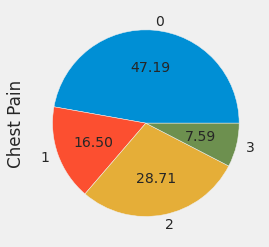

In [ ]:
heart_data.groupby('cp').size().plot(kind='pie', autopct='%.2f')
plt.ylabel('Chest Pain')

Text(0, 0.5, 'Target')

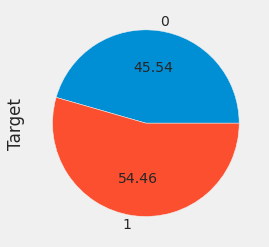

In [ ]:
heart_data.groupby('target').size().plot(kind='pie', autopct='%.2f')
plt.ylabel('Target')

In [ ]:
LR0 = 0.804878
KNN0 = 0.738095
SVM0 = 0.815789
DTC0 = 0.717391
RF0 = 0.800000

LR1 = 0.84
KNN1 = 0.795918
SVM1 = 0.811321
DTC1 = 0.822222
RF1 = 0.823529

plt.figure(figsize = (12, 12))

plt.bar(np.arange(5) - 0.2, [LR0, KNN0, SVM0, DTC0, RF0], width = 0.5, label = '0')
plt.bar(np.arange(5) + 0.2, [LR1, KNN1, SVM1, DTC1, RF1], width = 0.5, label = '1')
plt.legend()
plt.xticks(np.arange(5), ['LR', 'KNN', 'SVM', 'DTC', 'RF'])
plt.xlabel('Techniques')
plt.ylabel('Precision%')

Text(0, 0.5, 'Precision%')

Text(0, 0.5, 'Recall%')

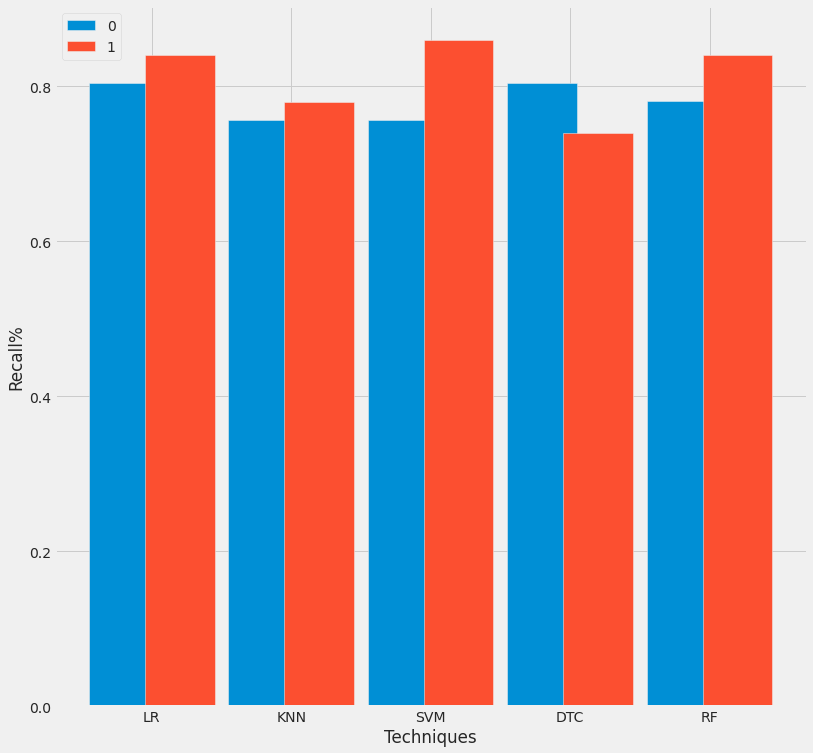

In [ ]:
LR0 = 0.804878
KNN0 = 0.756098
SVM0 = 0.756098
DTC0 = 0.804878
RF0 = 0.780488

LR1 = 0.84
KNN1 = 0.780000
SVM1 = 0.860000
DTC1 = 0.740000
RF1 = 0.840000

plt.figure(figsize = (12, 12))

plt.bar(np.arange(5) - 0.2, [LR0, KNN0, SVM0, DTC0, RF0], width = 0.5, label = '0')
plt.bar(np.arange(5) + 0.2, [LR1, KNN1, SVM1, DTC1, RF1], width = 0.5, label = '1')
plt.legend()
plt.xticks(np.arange(5), ['LR', 'KNN', 'SVM', 'DTC', 'RF'])
plt.xlabel('Techniques')
plt.ylabel('Recall%')

In [ ]:
LR0 = 0.804878
KNN0 = 0.746988
SVM0 = 0.784810
DTC0 = 0.758621
RF0 = 0.790123

LR1 = 0.84
KNN1 = 0.787879
SVM1 = 0.834951
DTC1 = 0.778947
RF1 = 0.831683

plt.figure(figsize = (12, 12))

plt.bar(np.arange(5) - 0.2, [LR0, KNN0, SVM0, DTC0, RF0], width = 0.5, label = '0')
plt.bar(np.arange(5) + 0.2, [LR1, KNN1, SVM1, DTC1, RF1], width = 0.5, label = '1')
plt.legend()
plt.xticks(np.arange(5), ['LR', 'KNN', 'SVM', 'DTC', 'RF'])
plt.xlabel('Techniques')
plt.ylabel('F1-Score%')

Text(0, 0.5, 'F1-Score%')

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
height = [82.41, 76.92, 81.31, 76.92, 81.31]
bars = ('LR', 'KNN', 'SVM', 'DTC', 'RF')
x_pos = np.arange(len(bars))

# Create bars with different colors
plt.bar(x_pos, height, color=['black', 'red', 'green', 'blue', 'cyan'])

# Create names on the x-axis
plt.xticks(x_pos, bars)

plt.xlabel('Techniques')
plt.ylabel('Accuracy')


# Show graph
plt.show()

